In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LassoLarsCV
%matplotlib inline

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


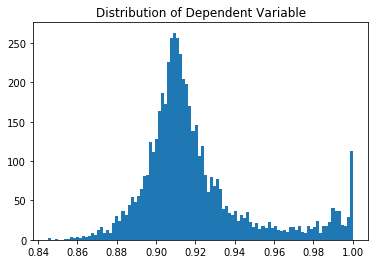

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [20]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]
X_train.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962
1,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384
2,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,0.000000,...,0.166667,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124
3,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,0.041667,...,0.000000,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776
4,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322


In [21]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [22]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [27]:
# Option 1 for tuning parameters: remove redundant predictors
def remove_single_feature(X_train, X_test):
    cols = X_train.columns
    single_val = []
    for index in cols:
        if (len(X_train[index].unique()) == 1):
            single_val.append(index)

    test_val = []
    for index in single_val:
        if (len(X_test[index].unique()) == 1):
            test_val.append(index)
            
    single_feature = list(set(single_val).intersection(set(test_val)))
    X_remove_train = X_train.drop(columns=single_feature)
    X_remove_test = X_test.drop(columns=single_feature)
    
    return X_remove_train, X_remove_test 

In [24]:
# Option 2 for tuning parameters: remove high collinearity features
def remove_high_correlation(X_train, X_test):
    corr_matrix = X_train.corr().abs()
    high_corr_var=np.where(corr_matrix>0.95)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    
    remove_vars = [i[0] for i in high_corr_var]
    
    X_corr_train = X_train.drop(columns=remove_vars)
    X_corr_test = X_test.drop(columns=remove_vars)
    return X_corr_train, X_corr_test

In [26]:
# Option 3 for tuning parameters: PCA
def scale_and_pca(X_train, X_test, pca_val):
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    X_train_scale = scaler.transform(X_train.values)
    X_test_scale = scaler.transform(X_test.values)
    
    pca = PCA(pca_val)
    
    pca.fit(X_train_scale)
    
    X_train_scale_pca = pca.transform(X_train_scale)
    X_test_scale_pca = pca.transform(X_test_scale)
    
    return X_train_scale_pca, X_test_scale_pca

In [30]:
X_original_train = X_train
X_original_test = X_test

In [50]:
X_single_train, X_single_test = remove_single_feature(X_original_train, X_original_test)

X_correlation_train, X_correlation_test = remove_high_correlation(X_original_train, X_original_test)

X_pca_train, X_pca_test = scale_and_pca(X_single_train, X_single_test, 0.95)

In [51]:
X_train, X_test = X_correlation_train, X_correlation_test
X_train.head()

,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,Feat 11,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962
1,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384
2,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,0.000000,0.0,...,0.166667,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124
3,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,0.041667,0.0,...,0.000000,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776
4,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322


In [52]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

r2_train_rf = []

# check multiple depths to see which depth is best
for i in range(1, 25):
    rf_reg = RandomForestRegressor(max_depth=i)
    rf_reg.fit(X_train, y_train)
    rf_yhat_train = rf_reg.predict(X_train)

    r2_train_rf.append( r2_score(y_train, rf_yhat_train))

print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf)
print('\n')

('R^2 Values for Train Using Random Forest Regression:', [0.031750533396099234, 0.05388533064967671, 0.07407603386603712, 0.10476619795599862, 0.13909162096272754, 0.1760398542465884, 0.21525562007445576, 0.2648725282118346, 0.31121776895275, 0.36068921779001084, 0.41622042162935924, 0.4560386039683604, 0.4967518222088544, 0.5136279384239373, 0.5662277427141087, 0.5836520977923747, 0.6443467729982209, 0.6598124741254328, 0.6633148047297134, 0.6839126700354621, 0.6968243625886705, 0.7119436685032619, 0.749681947113993, 0.7325673843881378])




In [53]:
# get best depth
import operator
index, value = max(enumerate(r2_train_rf), key=operator.itemgetter(1))
best_depth = index+1
print('Best Depth for Random Forest Tree Depth:', best_depth )

('Best Depth for Random Forest Tree Depth:', 23)


In [54]:
# Fine Tuning Random Forest: Initial Run with max_depth set to the optimal depth from shotgun approach
r2_train_rf_finetune = []

rf_reg = RandomForestRegressor(max_depth=best_depth)
rf_reg.fit(X_train, y_train)

rf_yhat_train = rf_reg.predict(X_train)
r2_train_rf_finetune.append( r2_score(y_train, rf_yhat_train))

print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf)

('R^2 Values for Train Using Random Forest Regression:', [0.031750533396099234, 0.05388533064967671, 0.07407603386603712, 0.10476619795599862, 0.13909162096272754, 0.1760398542465884, 0.21525562007445576, 0.2648725282118346, 0.31121776895275, 0.36068921779001084, 0.41622042162935924, 0.4560386039683604, 0.4967518222088544, 0.5136279384239373, 0.5662277427141087, 0.5836520977923747, 0.6443467729982209, 0.6598124741254328, 0.6633148047297134, 0.6839126700354621, 0.6968243625886705, 0.7119436685032619, 0.749681947113993, 0.7325673843881378])


In [55]:
# step 1: fine tune the number of trees
r2_train_rf_trees = []

# create list of tree numbers we will test
trees = [2**x for x in range(8)]  # 2, 4, 8, 16, 32, ... 

# test the tree numbers keeping max_depth at best_depth
for n_trees in trees:
    rf = RandomForestRegressor(n_estimators=n_trees, max_depth=best_depth, max_features='auto')
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)

    r2_train_rf_trees.append(r2_score(y_train, rf_yhat_train))
    
print('R^2 Values for Train Using Random Forest Regression:', r2_train_rf_trees)
print('\n')

('R^2 Values for Train Using Random Forest Regression:', [0.29549315601478954, 0.49728736404648344, 0.6667514534761019, 0.7132474744134484, 0.7449410457219462, 0.755856813407595, 0.7743333724362064, 0.7751069428516201])




In [56]:
# get best number of trees
index, value = max(enumerate(r2_train_rf_trees), key=operator.itemgetter(1))
best_tree = trees[index]
print('RandomForest Best Number of Trees:',best_tree)
print('R^2 Value:',value)

('RandomForest Best Number of Trees:', 128)
('R^2 Value:', 0.7751069428516201)


In [57]:
# find best number of maximum predictors to consider
# note: we ultimately decided this parameter had no significant effect on model accuracy

r2_train_rf_feat = []

for i in range(186, 252):
    rf = RandomForestRegressor(n_estimators=best_tree, max_depth=best_depth, max_features=i)
    rf.fit(X_train, y_train)

    rf_yhat_train = rf.predict(X_train)
    r2_train_rf_feat.append(r2_score(y_train, rf_yhat_train))
# got through 185 and the best was 80

In [58]:
# get best number of predictors and best R^2 value
index, value = max(enumerate(r2_train_rf_feat), key=operator.itemgetter(1))
best_num_predictors = index+1
print('RandomForest Number of Predictors for Best value:', best_num_predictors)
print('Final Best R^2 Value:',value)
print (len(r2_train_rf_feat))

In [59]:
rf = RandomForestRegressor(n_estimators=best_tree, max_depth=best_depth)
rf.fit(X_train, y_train)

print "Training RMSE: ", scoreRMSE(rf, X_train, y_train)
# 0.012867567452659339
# 0.012763220680344514

Training RMSE:  0.013275724172648003


In [60]:
# Make predictions with our model
predictions = rf.predict(X_test)

In [61]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.939030
1,2,0.913262
2,3,0.915379
3,4,0.931399
4,5,0.936057


In [62]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)